<a href="https://colab.research.google.com/github/god-data-unimib/DS_LAB_ECONOMICS_FOR_DS/blob/main/Logistic_Regression_DEF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORT LIBRARIES

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


#from pycaret.utils import enable_colab
#enable_colab()
#from pycaret.classification import *

from statsmodels.multivariate.manova import MANOVA
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.gofplots import qqplot
from statsmodels.graphics.tsaplots import plot_acf
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score, make_scorer, classification_report, confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

# allow plots to appear directly in the notebook
%matplotlib inline

In [19]:
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

PRE-PROCESSING

In [20]:
url = 'https://raw.githubusercontent.com/god-data-unimib/DS_LAB_ECONOMICS_FOR_DS/main/dataset1/telecom_users.csv'
df = pd.read_csv(url)
df = df.drop(columns=['customerID', 'Unnamed: 0'])
df['gender'] = df['gender'].replace({'Male': 0, 'Female':1})
df['Partner'] = df['Partner'].replace({'No': 0, 'Yes':1})
df['Dependents'] = df['Dependents'].replace({'No': 0, 'Yes':1})
df['PhoneService'] = df['PhoneService'].replace({'No': 0, 'Yes':1})
df['MultipleLines'] = df['MultipleLines'].replace({'No': 0, 'Yes':1, 'No phone service' : 3})
df['InternetService'] = df['InternetService'].replace({1: 0, 2: 1, 3: 2})
df['OnlineSecurity'] = df['OnlineSecurity'].replace({'No': 0, 'Yes': 1, 'No internet service': 2})
df['OnlineBackup'] = df['OnlineBackup'].replace({'No': 0, 'Yes': 1, 'No internet service': 2})
df['DeviceProtection'] = df['DeviceProtection'].replace({'No': 0, 'Yes': 1, 'No internet service': 2})
df['TechSupport'] = df['TechSupport'].replace({'No': 0, 'Yes': 1, 'No internet service': 2})
df['StreamingTV'] = df['StreamingTV'].replace({'No': 0, 'Yes': 1, 'No internet service': 2})
df['StreamingMovies'] = df['StreamingMovies'].replace({'No': 0, 'Yes': 1, 'No internet service': 2})
df['PaperlessBilling'] = df['PaperlessBilling'].replace({'No': 0, 'Yes':1})
df['InternetService'] = df['InternetService'].replace({'No': 0, 'Fiber optic': 1, 'DSL': 2})
df['Contract'] = df['Contract'].replace({'Two year': 0, 'Month-to-month': 1, 'One year': 2})
df['PaymentMethod'] = df['PaymentMethod'].replace({'Credit card (automatic)': 0, 'Bank transfer (automatic)': 1, 'Electronic check': 2, 'Mailed check': 3})
df['Churn'] = df['Churn'].replace({'No': 0, 'Yes':1})
df = df.dropna()
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors='coerce')
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].mean())

BUSINESS APPROACH

ELIMINATE COLUMNS DESCRIPTIVE ANALYSIS

In [21]:
df.drop(columns=['gender','PhoneService','MultipleLines', 'InternetService','OnlineSecurity', 'OnlineBackup', 'DeviceProtection', "TechSupport",
                 "StreamingTV","StreamingMovies" ], inplace=True)

CHECK VIF - MULTICOLLINEARITY

In [22]:
# ELIMINATE > 10
calc_vif(df)

,variables,VIF
0,SeniorCitizen,1.335437
1,Partner,2.818845
2,Dependents,1.907790
3,tenure,8.818067
4,Contract,2.921409
5,PaperlessBilling,2.844367
6,PaymentMethod,2.788658
7,MonthlyCharges,11.799679
8,TotalCharges,12.155085
9,Churn,1.777840


In [23]:
df.drop(columns=['TotalCharges', "MonthlyCharges"], inplace=True)

In [24]:
calc_vif(df)

,variables,VIF
0,SeniorCitizen,1.309364
1,Partner,2.796963
2,Dependents,1.878618
3,tenure,2.679617
4,Contract,2.537744
5,PaperlessBilling,2.415923
6,PaymentMethod,2.375788
7,Churn,1.540760


Assumption of Continuous IVs being Linearly Related to the Log Odds

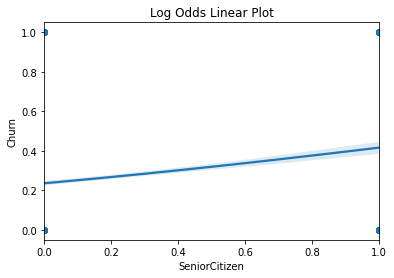

In [25]:
gp = sns.regplot(x='SeniorCitizen', y='Churn', data=df, logistic= True).set_title("Log Odds Linear Plot")
gp.figure.savefig("log lin.png")

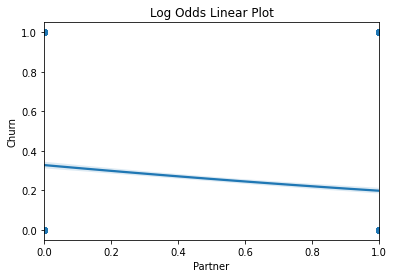

In [26]:
gp = sns.regplot(x='Partner', y='Churn', data=df, logistic= True).set_title("Log Odds Linear Plot")
gp.figure.savefig("log lin.png")

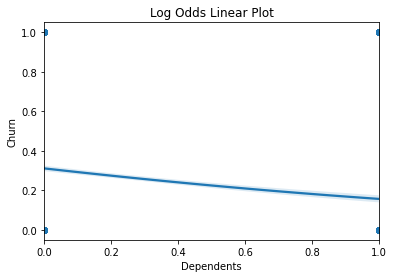

In [27]:
gp = sns.regplot(x= 'Dependents', y='Churn', data=df, logistic= True).set_title("Log Odds Linear Plot")
gp.figure.savefig("log lin.png")

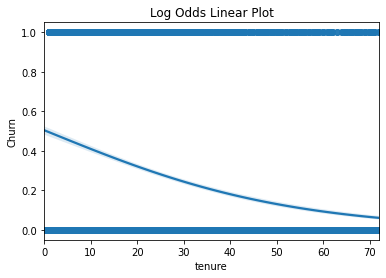

In [28]:
gp = sns.regplot(x='tenure', y='Churn', data=df, logistic= True).set_title("Log Odds Linear Plot")
gp.figure.savefig("log lin.png")

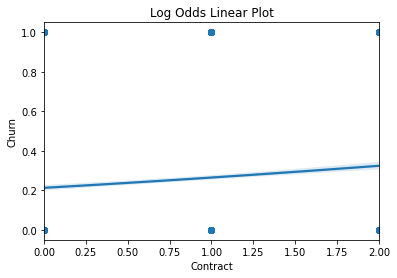

In [29]:
gp = sns.regplot(x='Contract', y='Churn', data=df, logistic= True).set_title("Log Odds Linear Plot")
gp.figure.savefig("log lin.png")

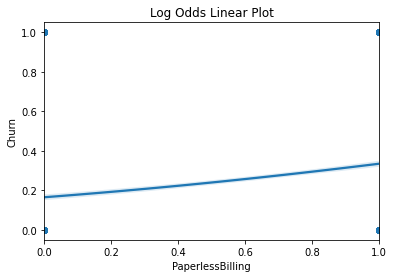

In [30]:
gp = sns.regplot(x='PaperlessBilling', y='Churn', data=df, logistic= True).set_title("Log Odds Linear Plot")
gp.figure.savefig("log lin.png")

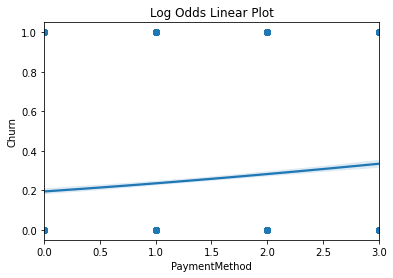

In [31]:
gp = sns.regplot(x='PaymentMethod', y='Churn', data=df, logistic= True).set_title("Log Odds Linear Plot")
gp.figure.savefig("log lin.png")

MODEL LOGISTIC REGRESSION

In [ ]:
train, test = train_test_split(df, test_size = 0.2, random_state=42)
X_LR = train[[ 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'Contract', 'PaperlessBilling', 'PaymentMethod']]
y_LR = train['Churn']
X_LR_test = test[['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'Contract', 'PaperlessBilling', 'PaymentMethod']]
y_LR_test = test['Churn']
LR_model = LogisticRegression()
grid_values = {'penalty': ['l1', 'l2', 'elasticnet', 'none'],'C':[0.001,.009,0.01,.09,1,5,10,25, 50, 100]}
grid_clf_acc = GridSearchCV(LR_model, param_grid = grid_values,scoring = 'recall')
grid_clf_acc.fit(X_LR, y_LR)

grid_clf_acc.best_params_

In [33]:
LR_model = LogisticRegression(solver = 'liblinear', class_weight='balanced', C=25, penalty = 'l1').fit(X_LR, y_LR, sample_weight=None)
y_pred_LR = LR_model.predict(X_LR_test)
print('Accuracy Score : ' + str(accuracy_score(y_LR_test,y_pred_LR)))
print('Precision Score : ' + str(precision_score(y_LR_test,y_pred_LR)))
print('Recall Score : ' + str(recall_score(y_LR_test,y_pred_LR)))
print('F1 Score : ' + str(f1_score(y_LR_test,y_pred_LR)))

#Dummy Classifier Confusion matrix
cm= confusion_matrix(y_LR_test,y_pred_LR)
print('Confusion Matrix : \n' + str(cm))

Accuracy Score : 0.67779632721202
Precision Score : 0.42125237191650855
Recall Score : 0.7326732673267327
F1 Score : 0.5349397590361447
Confusion Matrix : 
[[590 305]
 [ 81 222]]
